# Лабораторная работа 4. 
# Методы поиска.


## Выполнил студент группы Курмашев Данил БПИ2303
***

### Задание

Реализовать методы поиска в соответствии с заданием. Организовать генерацию начального набора случайных данных. Для всех вариантов добавить реализацию добавления, поиска и удаления элементов. Оценить время работы каждого алгоритма поиска и сравнить его со временем работы стандартной функции поиска, используемой в выбранном языке программирования.



In [2]:
import timeit
import random
import matplotlib.pyplot as plt
import numpy as np

### Задание №1
Бинарный поиск | Бинарное дерево | Фибоначчие | Интерполяционный

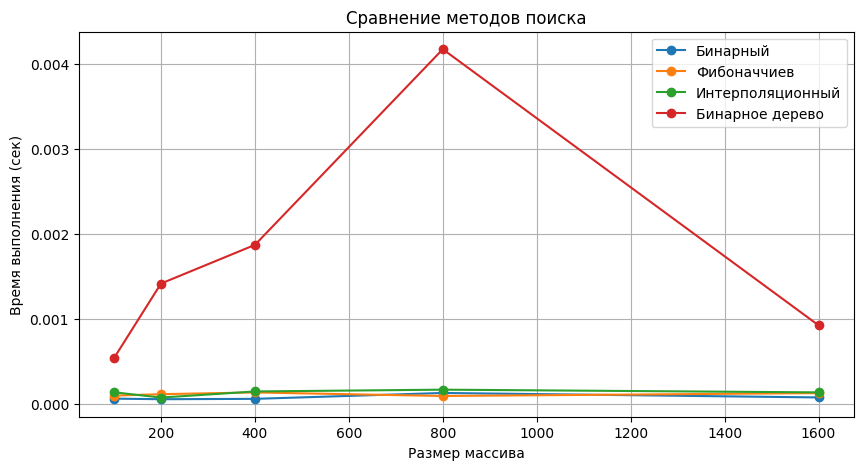

In [3]:
def binary_search(arr, target):
    left, right = 0, len(arr) - 1
    while left <= right:
        mid = (left + right) // 2
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            left = mid + 1
        else:
            right = mid - 1
    return -1

class Node:
    def __init__(self, key):
        self.left = None
        self.right = None
        self.val = key

class BinarySearchTree:
    def __init__(self):
        self.root = None

    def insert(self, key):
        if self.root is None:
            self.root = Node(key)
        else:
            self._insert(key, self.root)

    def _insert(self, key, node):
        if key < node.val:
            if node.left is None:
                node.left = Node(key)
            else:
                self._insert(key, node.left)
        elif key > node.val:
            if node.right is None:
                node.right = Node(key)
            else:
                self._insert(key, node.right)

    def search(self, key):
        return self._search(key, self.root)

    def _search(self, key, node):
        if node is None or node.val == key:
            return node
        if key < node.val:
            return self._search(key, node.left)
        return self._search(key, node.right)

def fibonacci_search(arr, target):

    fib1, fib2 = 0, 1
    fib_sum = fib1 + fib2
    while fib_sum < len(arr):
        fib1 = fib2
        fib2 = fib_sum
        fib_sum = fib1 + fib2

    offset = -1
    while fib_sum > 1:
        i = min(offset + fib1, len(arr) - 1)
        if arr[i] < target:
            fib_sum = fib2
            fib2 = fib1
            fib1 = fib_sum - fib2
            offset = i
        elif arr[i] > target:
            fib_sum = fib1
            fib2 = fib2 - fib1
            fib1 = fib_sum - fib2
        else:
            return i
    if fib2 == 1 and arr[offset+1] == target:
        return offset + 1
    return None


def interpolation_search(arr, target):
    low, high = 0, len(arr) - 1
    while low <= high and arr[low] <= target <= arr[high]:
        if arr[high] == arr[low]:
            return low if arr[low] == target else -1

        pos = low + ((target - arr[low]) * (high - low) // max(1, arr[high] - arr[low]))

        if pos < low or pos > high:
            return -1

        if arr[pos] == target:
            return pos
        elif arr[pos] < target:
            low = pos + 1
        else:
            high = pos - 1
    return -1

sizes = [100, 200, 400, 800, 1600]
arrays = [sorted(random.sample(range(size * 10), size)) for size in sizes]
targets = [np.random.choice(arr) for arr in arrays]

results = {"Бинарный": [], "Фибоначчиев": [], "Интерполяционный": [], "Бинарное дерево": []}

for arr, target in zip(arrays, targets):
    size = len(arr)

    time_binary = timeit.timeit(lambda: binary_search(arr, target), number=10)
    results["Бинарный"].append(time_binary)

    time_fibonacci = timeit.timeit(lambda: fibonacci_search(arr, target), number=10)
    results["Фибоначчиев"].append(time_fibonacci)

    time_interpolation = timeit.timeit(lambda: interpolation_search(arr, target), number=10)
    results["Интерполяционный"].append(time_interpolation)

    bst = BinarySearchTree()
    for num in arr:
        bst.insert(num)
    
    time_bst = timeit.timeit(lambda: bst.search(target), number=10)
    results["Бинарное дерево"].append(time_bst)

plt.figure(figsize=(10, 5))
for method, times in results.items():
    plt.plot(sizes, times, marker='o', linestyle='-', label=method)

plt.xlabel("Размер массива")
plt.ylabel("Время выполнения (сек)")
plt.title("Сравнение методов поиска")
plt.legend()
plt.grid(True)
plt.show()


### Задание №2
Простое рехэширование | Рехэширование с помощью псевдослучайных чисел | Метод цепочек

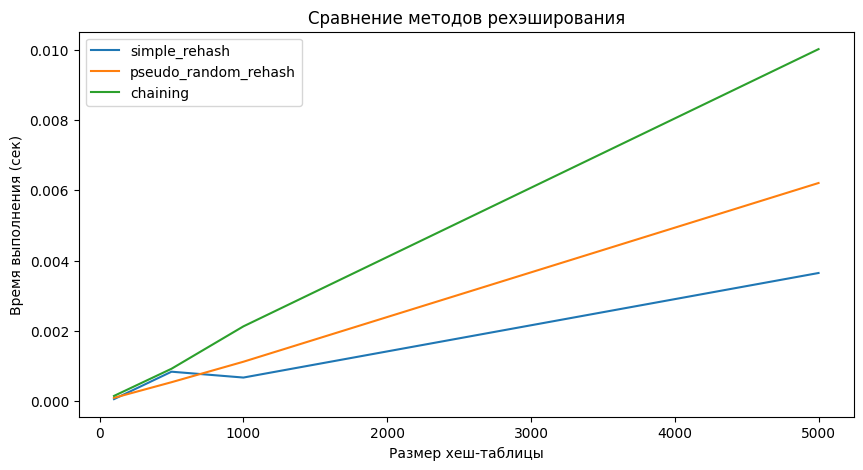

In [ ]:
class HashTable:
    def __init__(self, size):
        self.size = size
        self.table = [None] * size

    def simple_rehash(self, key):
        return key % self.size

    def pseudo_random_rehash(self, key, attempt):
        return (key + attempt * (7 - (key % 7))) % self.size

    def chaining_insert(self, key, value):
        index = key % self.size
        if self.table[index] is None:
            self.table[index] = []
        self.table[index].append((key, value))

sizes = [100, 500, 1000, 5000]
hash_results = {"simple_rehash": [], "pseudo_random_rehash": [], "chaining": []}

def test_hashing(size):
    ht = HashTable(size)
    keys = random.sample(range(size * 10), size)
    
    time_simple = timeit.timeit(lambda: [ht.simple_rehash(k) for k in keys], number=10)
    time_pseudo = timeit.timeit(lambda: [ht.pseudo_random_rehash(k, 1) for k in keys], number=10)
    time_chaining = timeit.timeit(lambda: [ht.chaining_insert(k, "value") for k in keys], number=10)
    
    return time_simple, time_pseudo, time_chaining

for size in sizes:
    t_simple, t_pseudo, t_chaining = test_hashing(size)
    hash_results["simple_rehash"].append(t_simple)
    hash_results["pseudo_random_rehash"].append(t_pseudo)
    hash_results["chaining"].append(t_chaining)

plt.figure(figsize=(10, 5))
for method, times in hash_results.items():
    plt.plot(sizes, times, label=method)

plt.xlabel("Размер хеш-таблицы")
plt.ylabel("Время выполнения (сек)")
plt.legend()
plt.title("Сравнение методов рехэширования")
plt.show()

### Задание №3
Расставить на стандартной 64-клеточной шахматной доске 8 ферзей так, чтобы ни один из них не находился под боем другого». Подразумевается, что ферзь бьёт все клетки,  расположенные по вертикалям, горизонталям и обеим диагоналям. Написать программу,  которая находит хотя бы один способ решения задач.

Найдено 92 решений


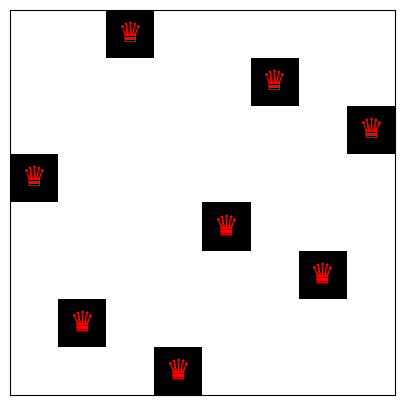

In [4]:
def is_safe(board, row, col, n):
    for i in range(row):
        if board[i] == col or abs(board[i] - col) == abs(i - row):
            return False
    return True

def solve_n_queens(n, row=0, board=[]):
    if row == n:
        return [board[:]]
    solutions = []
    for col in range(n):
        if is_safe(board, row, col, n):
            board.append(col)
            solutions.extend(solve_n_queens(n, row + 1, board))
            board.pop()
    return solutions

def draw_chessboard(solution):
    board = np.zeros((8, 8))
    for row, col in enumerate(solution):
        board[row, col] = 1
    
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(board, cmap=plt.cm.gray_r)
    
    for i in range(8):
        for j in range(8):
            if board[i, j] == 1:
                ax.text(j, i, '♛', ha='center', va='center', fontsize=20, color='red')
    
    plt.xticks([])
    plt.yticks([])
    plt.show()

solutions = solve_n_queens(8)
print(f"Найдено {len(solutions)} решений")

draw_chessboard(solutions[23])